<a href="https://colab.research.google.com/github/wind123mountain/MNIST_DL_Tensorflow/blob/main/MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

mnist = keras.datasets.mnist
(X_full, y_full), (X_test, y_test) = mnist.load_data()

X_valid, X_train = X_full[:5000] / 255.0, X_full[5000:] / 255.0
y_valid, y_train = y_full[:5000], y_full[5000:]

X_test = X_test / 255.0


11501568/11490434 [==============================] - 0s 0us/step


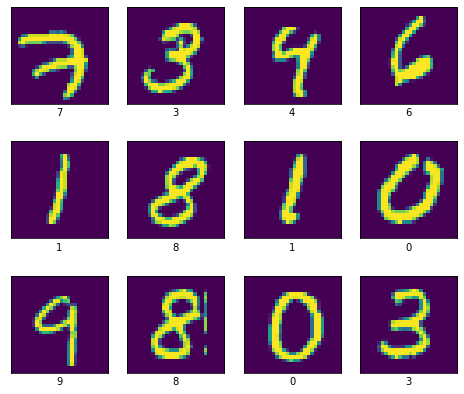

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 7))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()


In [ ]:
#Reshape input 2D

X_train = X_train.reshape((55000, 28, 28, 1))
X_valid = X_valid.reshape((5000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

# build the model
'''
model = Sequential([
    #data_augmentation,
    Conv2D(32, (3, 3), strides=(2, 2), activation="relu", input_shape=(28, 28, 1), padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    #MaxPooling2D((2, 2)),
    #Dropout(0.5),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax"),
])
'''
'''
model = Sequential([
    #data_augmentation,
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1), padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    #Dropout(0.5),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax"),
])
'''
'''
model = Sequential([
    #data_augmentation,
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1), padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(160, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    #Dropout(0.5),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    #Dense(32, activation="relu"),
    Dense(10, activation="softmax"),
])
'''
from tensorflow.keras import regularizers
model = Sequential([
    Conv2D(16, (5, 5), activation="relu", input_shape=(28, 28, 1), padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(32, (5, 5), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax"),
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [ ]:
# compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9), 
              metrics=["accuracy"])


In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="checkpoint.hdf5"
callback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# start training
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/30
 138/1719 [=>............................] - ETA: 12s - loss: 0.0283 - accuracy: 0.9907

KeyboardInterrupt: ignored

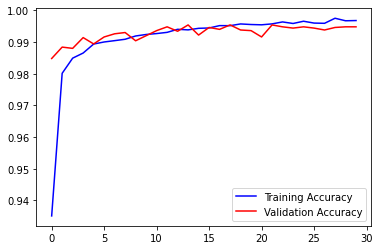

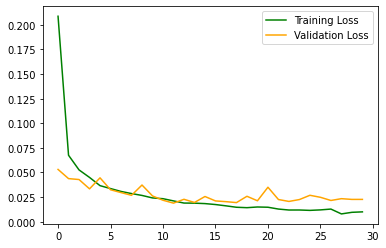

In [ ]:
def plot_graph():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(range(epochs), acc, "b", label="Training Accuracy")
    plt.plot(range(epochs), val_acc, "r", label="Validation Accuracy")
    plt.legend()

    plt.figure()

    plt.plot(range(epochs), loss, "g", label="Training Loss")
    plt.plot(range(epochs), val_loss, "orange", label="Validation Loss")
    plt.legend()

    plt.show()

plot_graph()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0218 - accuracy: 0.9945

Test accuracy: 0.9944999814033508


In [ ]:
print(f'TEST ERROR RATE: {((1-test_acc)*100):.2f} %')

TEST ERROR RATE: 0.55 %
